# Car Evaluation ML Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_excel('car_data1.xlsx',index_col=0)

# EDA

In [8]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Get info of dataset and check for null values if any

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB


As all the columns are categorical, check for unique values of each column

In [10]:
for i in data.columns:
    print(data[i].value_counts())
    print()

med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64

med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64

5more    432
4        432
3        432
2        432
Name: doors, dtype: int64

more    576
4       576
2       576
Name: persons, dtype: int64

med      576
small    576
big      576
Name: lug_boot, dtype: int64

med     576
low     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



From above output, it is clear that all the columns except 'class' are distributed equally among data.

Below is the graph which gives the count of unique values in column.

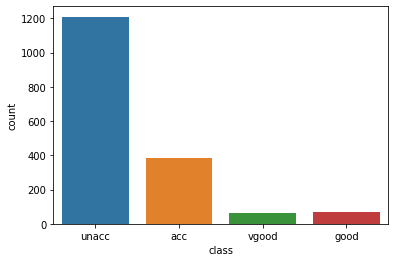

In [11]:
sns.countplot(data['class'])

It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'. So, this is an unbalanced multiclass classification problem.

I've checked how the 'class' is distributed for each of the feature in our data.

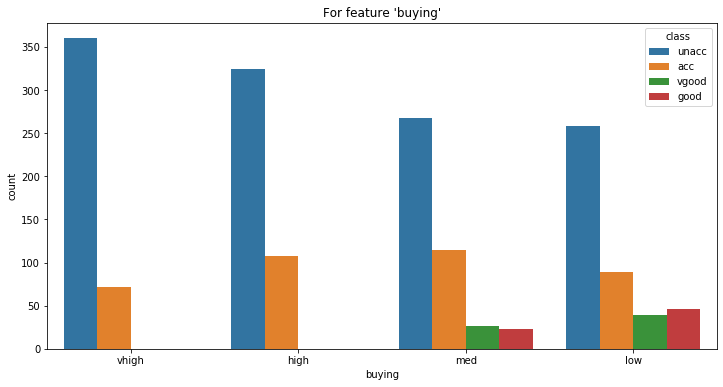

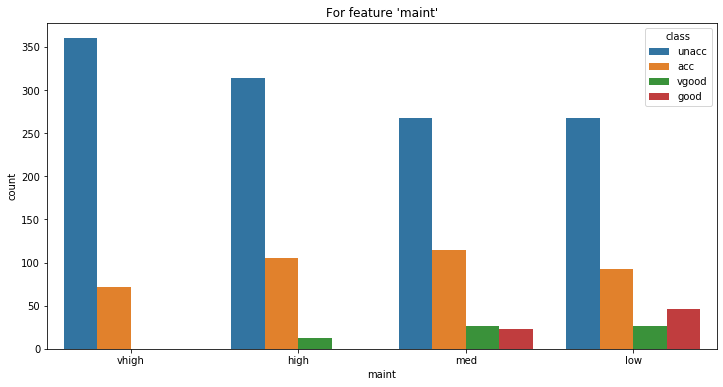

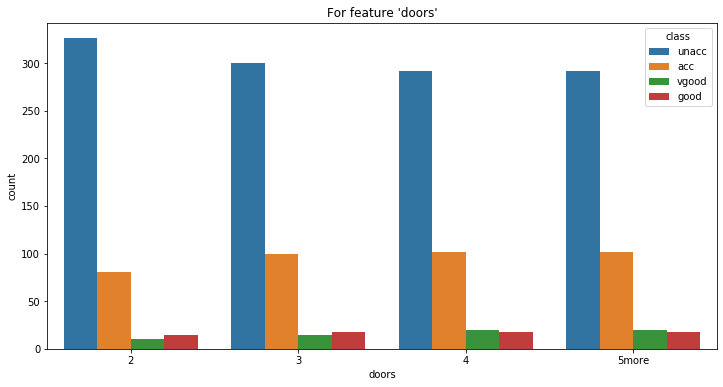

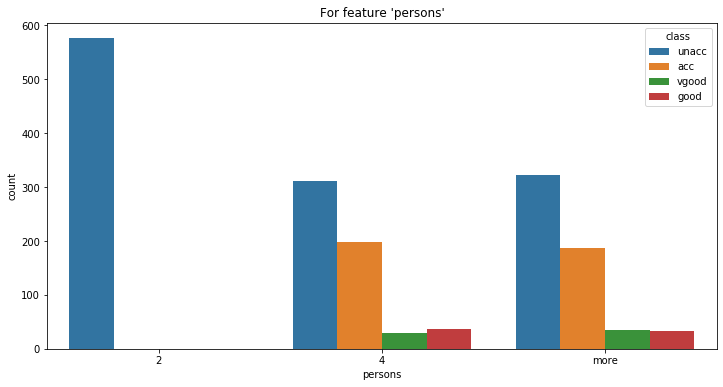

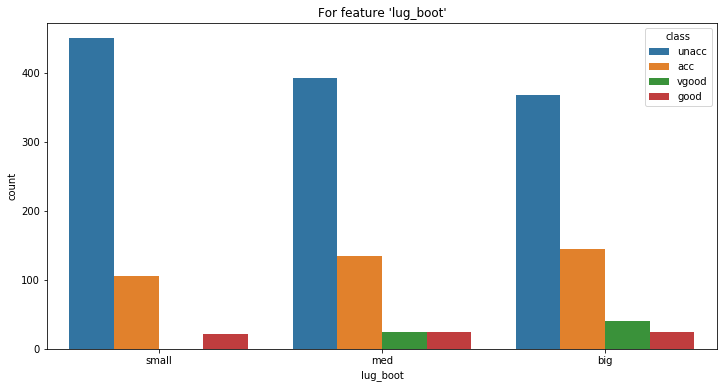

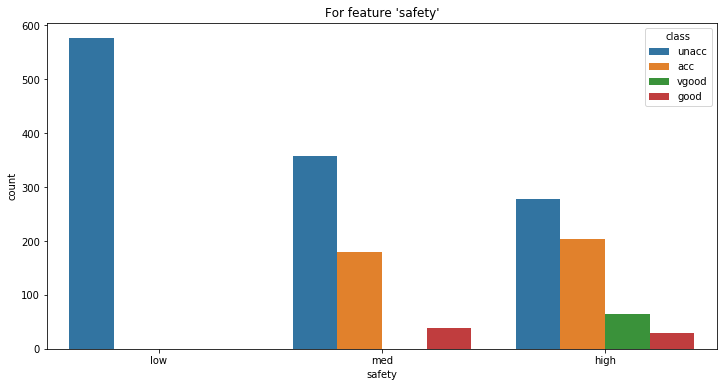

In [13]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

As scikit-learn algorithms do not generally work with string values, I've converted string categories to integers.

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [16]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Heatmap of the columns on dataset with each other. It shows Pearson's correlation coefficient of column w.r.t other columns.

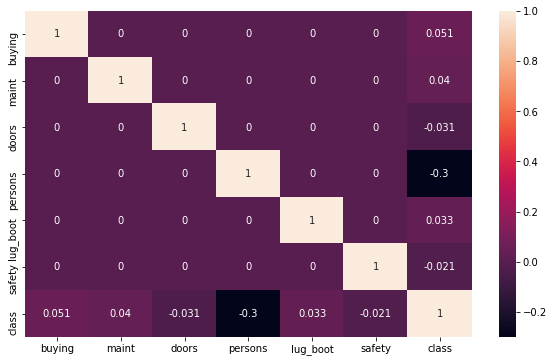

In [17]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class'. 'persons' column is showning a weak relation with 'class'. Other columns except 'class' shows no correlation with each other.

So, plotting these columns with each other or doing any analysis on them may not give any productive output.

In [18]:
X=data[data.columns[:-1]]
y=data['class']

In [19]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


Divide data in train and test sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [24]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [25]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred=logreg.predict(X_test)

In [27]:
logreg.score(X_test,y_test)

0.6647398843930635

So, basic logistic regression model is giving very less accuracy. Let's check the learning curves

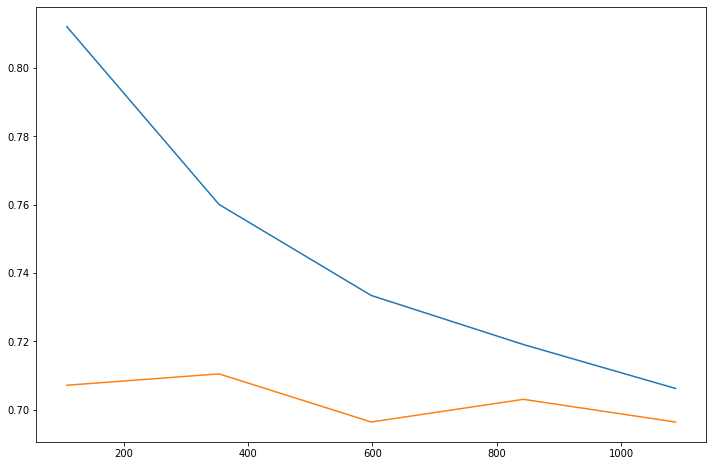

In [32]:
from sklearn.model_selection import learning_curve
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

From above graph, with the increasing number of samples, train accuracy is decreasing.

I tried modifying regularization parameter

In [33]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [34]:
curve

(array([[0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70837642, 0.71768356, 0.70837642, 0.71354705, 0.7107438 ],
        [0.70527404, 0.71251293, 0.70630817, 0.70527404, 0.70764463]]),
 array([[0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.73966942, 0.67355372, 0.7107438 , 0.70661157, 0.70124481],
        [0.70247934, 0.66942149, 0.70661157, 0.7107438 , 0.70539419]]))

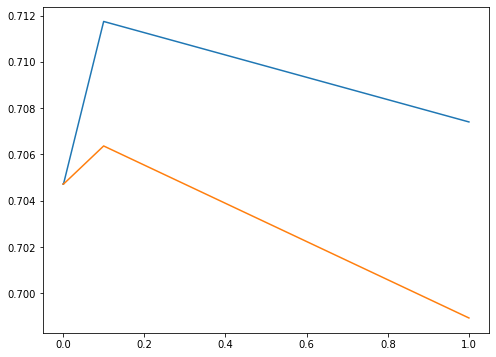

In [35]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

It clear that C=0.1 is giving a good result.

Now, as it is a multiclass classification, I tired using 'newton-cg','sag','lgfbs' solvers.

As this dataset is smaller, we can use GridSearch to get best possible parameters

In [37]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [38]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096807379719489



So, with the above parameters, we can get at accuary of 71%.

As it is an unbalanced classification problem, accuracy can't be a good criterion for evaluation. But accuary itself is very low, so, I didn't check for other criteria.

# KNN Classifier

As logistic regression didn't give accuracy, I tried KNN classification

In [42]:
knn=KNeighborsClassifier(n_jobs=-1)

In [43]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9017341040462428

So, the default KNN classificaton model is giving an accuracy of 90%

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519




As I said earlier accuracy can't be a fair criterion to evaluate unbalanced classification, so I checked for 'f1-score'

f1-score is 0.9 which is better than previous model

Now I checked for various parameters for 'n_neighbours'. You can do it by grid_Search directly, but I did it using the code given below so that I can visualize the effect of n_neighbours.

# Conclusion



KNN Classifier is the best suitable model for this data

We are able to achieve 90% accuracy with this model

In [50]:
import joblib
joblib.dump(knn,'car_eva.pkl')

['car_eva.pkl']

In [51]:
model=joblib.load('car_eva.pkl')

In [52]:
model.predict(X_test)

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,